# ECE 311 Lab Final:

## Due Date: Saturday, 12/15 @ 11:59PM
#### Note: a 10% penalty will be applied for each hour your submission is late!

This lab final will review the import concepts from the course. Much of this lab should be familiar from previous labs. We encourage you to look back on your previous labs or look at the posted lab solutions on the course website to remind you how to produce your results and evaluate their correctness. Enough talking, let's get started!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy import signal
from pz_plot import pz_plot
from scipy.io import wavfile
from numpy.random import randn
from IPython.display import Audio

%matplotlib inline

## Exercise 1: Building an Edge Detector 2.0

In Lab 2 Exercise 4, we built a simple edge detector by applying a high-pass filter along the rows and columns of an image, then combined the two results to create an image of detected edges. In this exercise, we will build a more sophisticated edge detector by adding onto our original design. This improved detector is known as the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

The Sobel operator uses the same intuition of finding horizontal and vertical edges separately, then combining these results to form the image. Let $G_x$ be our resulting image from detecting vertical edges (through the x-axis) and $G_y$ be our resulting image from detecting horizontal edges (through the y-axis, then our final result will be given by

$$
G[i,j] = \sqrt{G^2_x[i,j]+G^2_y[i,j]},
$$

where $G[i,j]$ is the pixel value at row $i$, column $j$. We compute $G_x$ and $G_y$ via convolution as follows:

$$
G_x = I * \begin{bmatrix}
1 & 0 & -1\\
\end{bmatrix} * \begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$
G_y = I * \begin{bmatrix}
1\\
0\\
-1\\
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix},
$$

where $I$ is our original image and $*$ denotes the convolution operator. Note that in the computation of $G_x$ we convolve along the rows with a high-pass filter and convolve along the columns with a low-pass filter, while the computation of $G_y$ reverses this relationship with the same filters.

a. Compute the image $G_x$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **row** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **column**. Also, be sure to use the "same" mode when using $\textrm{signal.convolve()}$.

b. Compute the image $G_y$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **column** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **row**.

c. Create final result image $G$ according to the above formulation. Plot your resulting image in grayscale.

d. We have provided the corresponding output images from Lab 2 Exercise 4 in the Lab Final folder (under ``Lab2Ex4c.png``, etc). Look at the results and compare to the results the Sobel operator has generated. The Sobel operator results should look better. Why do you think the Sobel operator performs better?

Text(0.5,1,'Lab 2 Ex 4c')

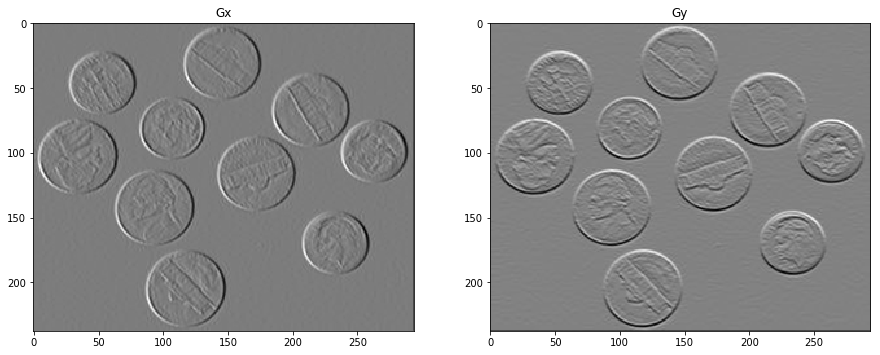

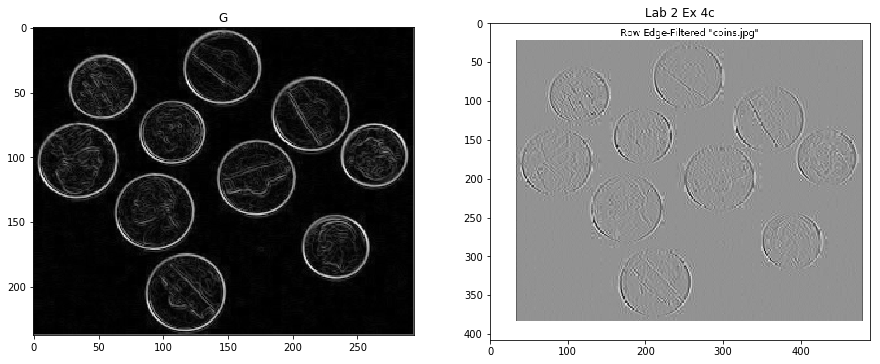

In [20]:
#load coins.jpg
coins = imread('coins.jpg')
n_rows,n_cols = coins.shape
lab2 = imread('Lab2Ex4c.png')

#Code for part a.
hpf = [1,0,-1]
lpf = [1,2,1]
coins_row = np.zeros(coins.shape)
coins_filtered = np.zeros(coins.shape)
for i in range(n_rows):
    coins_row[i,:] = signal.convolve(coins[i,:],hpf,'same')
for j in range(n_cols):
    coins_filtered[:,j] = signal.convolve(coins_row[:,j],lpf,'same')
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(coins_filtered, 'gray')
plt.title('Gx')

#Code for part b:
hpfB = [1,2,1]
lpfB = [1,0,-1]
coins_col = np.zeros(coins.shape)
coins_filteredB = np.zeros(coins.shape)
for i in range(n_cols):
    coins_col[:,i] = signal.convolve(coins[:,i],lpfB,'same')
for j in range(n_rows):
    coins_filteredB[j,:] = signal.convolve(coins_col[j,:],hpfB,'same')
plt.subplot(122)
plt.imshow(coins_filteredB, 'gray')
plt.title('Gy')

#Code for part c:
coins_final = np.zeros(coins.shape)
for i in range(len(coins)):
    coins_final[i] = np.sqrt(coins_filtered[i]**2 + coins_filteredB[i]**2)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(coins_final, 'gray')
plt.title('G')
#comparison
plt.subplot(122)
plt.imshow(lab2, 'gray')
plt.title('Lab 2 Ex 4c')


Comments for part 1.d here: The image looks better and sharper than the Lab 2 example since we use both low pass filter and high pass.  This is essentially using a bandstop filter to accentuate the two extremes of the image in order to produce a higher contrast image to show the edges much more cleanly.



## Exercise 2: LCCDE, Transfer Function, and Impulse Response

For each of the following Linear Constant Coefficient Difference Equations (LCCDE), determine the transfer function (numerator and denominator coefficients) in order to plot both the pole-zero plot and impulse response of the system for the requested number of points. **Please plot your impulse responses as a stem plot!** For each system, indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.

Note: We have provided the $\textrm{pz_plot}()$ function from Lab 3 to create your pole-zero plots. Refer to Lab 3 for usage of this function. Some other functions of interest you may want to use from Lab 3 will be $\textrm{signal.dimpulse()}$ and $\textrm{signal.tf2zpk()}$.

a. $y_1[n] = \frac{1}{2}x[n]-\frac{1}{4}x[n-1]+x[n-2]-
\frac{1}{4}x[n-3]+\frac{1}{2}x[n-4],\quad 0\leq n < 8$

b. $y_2[n] = x[n] + \frac{1}{4}x[n-2] + 3y_2[n-1] - 2y_2[n-2],\quad 0\leq n < 20$

c. $y_3[n] = x[n] - \frac{1}{4}x[n-2] - y_3[n-3], \quad 0\leq n < 20$

Text(0.5,1,'Impulse Response of 2c')

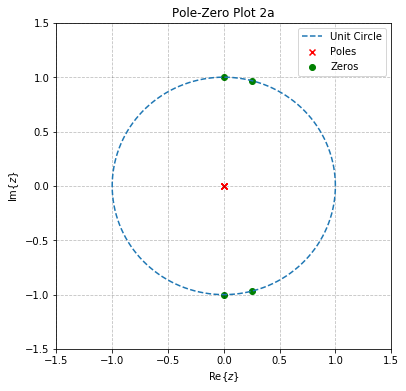

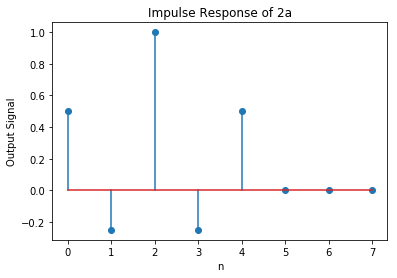

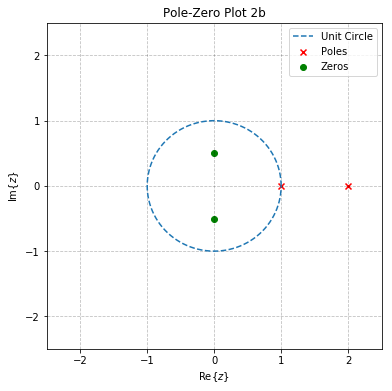

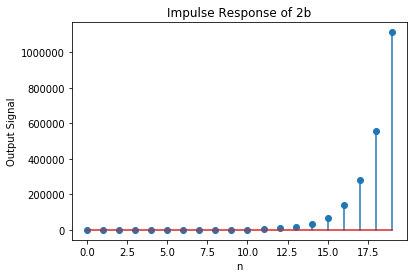

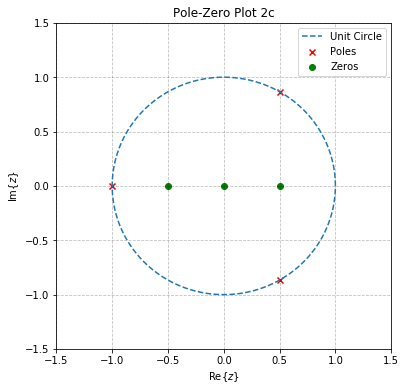

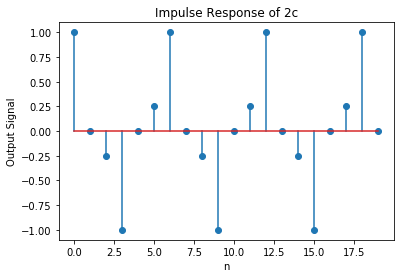

In [17]:
#Code for exercise 2a:
b = [2,-1,4,-1,2]
a = [4,0,0,0,0]
z, p, _ = signal.tf2zpk(b,a) # _ is system gain -> ignore
pz_plot(z,p,'Pole-Zero Plot 2a')
n,y = signal.dimpulse((b,a,1),n=8) #the 1 is for the change in time per sample, n=8 means 8 points for output
h_n = y[0]
plt.figure()
plt.stem(n,h_n) #plot first 8 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of 2a')

#Code for exercise 2b:
b = [1,0,0.25]
a = [1,-3,2]
z, p, _ = signal.tf2zpk(b,a) # _ is system gain -> ignore
pz_plot(z,p,'Pole-Zero Plot 2b')
n,y = signal.dimpulse((b,a,1),n=20) #the 1 is for the change in time per sample, n=20 means 20 points for output
h_n = y[0]
plt.figure()
plt.stem(n,h_n) #plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of 2b')

#Code for exercise 2c:
b = [1,0,-0.25,0]
a = [1,0,0,1]
z, p, _ = signal.tf2zpk(b,a) # _ is system gain -> ignore
pz_plot(z,p,'Pole-Zero Plot 2c')
n,y = signal.dimpulse((b,a,1),n=20) #the 1 is for the change in time per sample, n=20 means 20 points for output
h_n = y[0]
plt.figure()
plt.stem(n,h_n) #plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of 2c')


Comments for 2.a: This transfer function is BIBO stable since the only pole exists at z=0, which is contained within the unit circle.


Comments for 2.b: This transfer function is __not__ BIBO stable since it has poles that exist outside of the unit circle.


Comments for 2.c: This transfer function is __not__ BIBO stable since it has poles that are *on* the unit circle, which is marginally stable but considered not BIBO stable for ECE310 and this course.



## Exercise 3: Windows and Spectral Resolution

a. Plot the magnitude spectrum (not dB scale) of the following signal using $\textrm{np.fft.rfft()}$.

$$
x_1[n] = 0.5\sin\left(0.5\pi n\right) + 0.05\sin\left(0.57\pi n\right), \quad 0\leq n < 80
$$

What is happening to the second sinusoid with the smaller magnitude in the frequency domain? Would it be easy to algorithmically locate this frequency peak?

b. Fill in the function $\textrm{modify()}$ below which applies a Hamming window to an input signal. Apply this function to $x_1[n]$ and plot the resulting magnitude spectrum. Is it easier to locate the smaller frequency now?

c. Now let's try resolving two close, but equally large frequency peaks in the below signal $x_2[n]$.

$$
x_2[n] = 0.5\sin\left(0.5\pi n\right) + 0.5\sin\left(0.518\pi n\right), \quad 0\leq n < 80
$$

Plot the magnitude spectrum of $x_2[n]$ (not dB scale) before and after applying the $\textrm{modify()}$ function. Is it easier to differentiate between the two peaks after applying the Hamming window? Why or why not? **Hint: think about the tradeoff between rectangular and Hamming windows!**


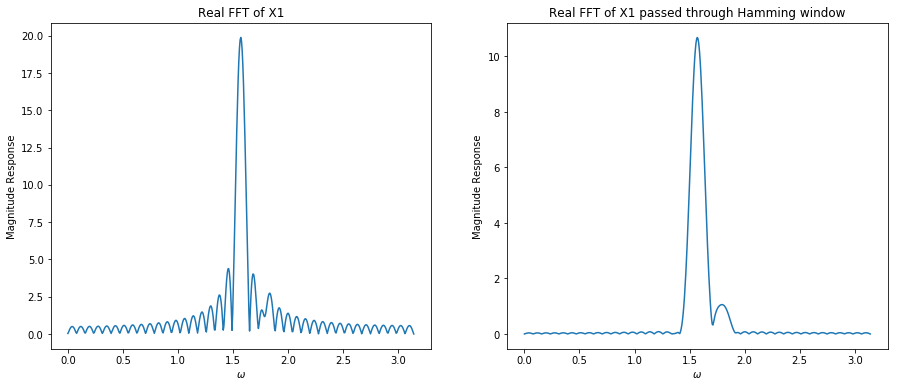

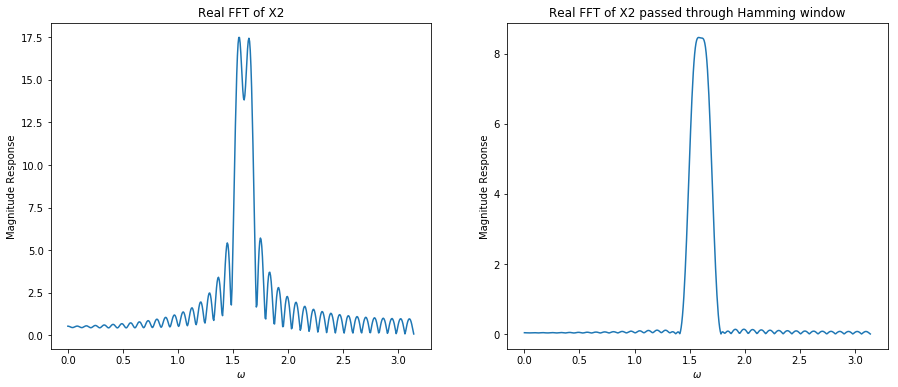

In [15]:
#Code for part 3.a:
x1 = np.zeros(80)
for n in range(80):
    x1[n] = (0.5*np.sin(0.5*np.pi*n) + 0.05*np.sin(0.57*np.pi*n))
real_fft = np.fft.rfft(x1,1024)
omega_real = np.linspace(0,np.pi,len(real_fft))
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Real FFT of X1')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omega_real,np.absolute(real_fft))

#Code for part 3.b:
def modify(x):
    #apply a hamming window to the signal
    hamm_window = signal.hamming(80)
    modified = x * hamm_window
    return modified

xmod = modify(x1)
mod_fft = np.fft.rfft(xmod,1024)
omega_mod = np.linspace(0,np.pi,len(mod_fft))
plt.subplot(122)
plt.title('Real FFT of X1 passed through Hamming window')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omega_mod,np.absolute(mod_fft))

#Code for part 3.c:
x2 = np.zeros(80)
for n in range(80):
    x2[n] = (0.5*np.sin(0.5*np.pi*n) + 0.5*np.sin(0.518*np.pi*n))
real_fft2 = np.fft.rfft(x2,1024)
omega_real2 = np.linspace(0,np.pi,len(real_fft2))
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Real FFT of X2')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omega_real2,np.absolute(real_fft2))

x2mod = modify(x2)
mod_fft2 = np.fft.rfft(x2mod,1024)
omega_mod2 = np.linspace(0,np.pi,len(mod_fft2))
plt.subplot(122)
plt.title('Real FFT of X2 passed through Hamming window')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omega_mod2,np.absolute(mod_fft2))

Comments for part 3.a: The second sinusoid's frequency is very close to the first's, but it's magitude is much smaller, so it is not prominent and looks like a modified side lobe.  It would be hard to algorithmically locate since it seems mixed into the side lobes of the main signal. 


Comments for part 3.b: Yes, very much so.


Comments for part 3.c: No, after applying the Hamming window, the two peaks are hard to differentiate since they are of equal magnitude and at such close frequencies.  The Hamming window is not precise enough to differentiate the two and merges them into one, whereas a rectangular window could have a very precise cutoff frequency to differentiate the two peaks from each other.



## Exercise 4: Chirp Redux

For this exercise, we will revisit the chirp activity from Lab 4 but this time with the help of spectrograms to visualize our chirps. The below provided code creates a five second long chirp signal with sampling rate $f_s = 44,100~Hz$ and maximum signal frequency $22,050~Hz$. Recall that the $\textrm{signal.chirp}$ function linearly sweeps between the requested frequencies over the set time interval. Hint: referring back to Labs 4 and 5 will help with understanding the chirp function and plotting spectrograms, respectively.

a. Plot the spectrogram of the original chirp signal we have generated for you.

b. Reduce the sampling rate of the original chirp signal by a factor of 5. Plot the resulting spectrogram and explain what you see. If we listened to this audio signal, how many rises and falls would you hear? **Note: you may either create a new chirp signal using the requested lower sampling or perform downsampling without an anti-aliasing filter.**

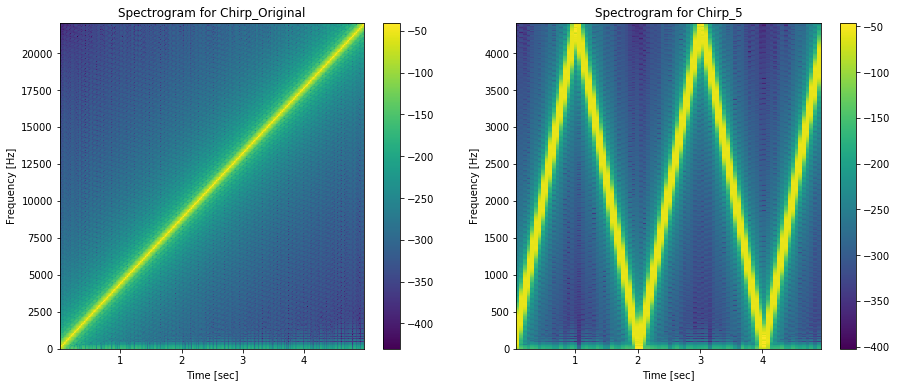

In [18]:
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

Fs = 44100 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t,f0 = f0, t1 = t1, f1 = f1)
nfft = 1024

#Code for part 4.a:
f_a, t_a, S_a = signal.spectrogram(chirp_original, Fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.pcolormesh(t_a, f_a, sig2db(S_a))
plt.title('Spectrogram for Chirp_Original')
plt.ylim([f0, f1])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

#Code for part 4.b:
Fsb = 8820 #sampling rate for audio clip in Hz
t1b = 5 #make clips 5 seconds
tb = np.linspace(0,t1b,t1b*Fsb)
f0b = 0 #start frequency (Hz)
f1b = 22050 #end frequency (Hz)
chirp_5 = signal.chirp(tb,f0 = f0b, t1 = t1b, f1 = f1b)

#Code for part 4.a:
f_b, t_b, S_b = signal.spectrogram(chirp_5, Fsb, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)
#plt.figure(figsize=(15,6))
plt.subplot(122)
plt.pcolormesh(t_b, f_b, sig2db(S_b))
plt.title('Spectrogram for Chirp_5')
plt.ylim([f0b, f1b/5])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()


Comments for 4.b: There would be 3 rises and 2 falls if we were listen to the modified chrip.


## Exercise 5: FIR Filter Design

a. Given the audio signal file ``Sound_original.wav``, compute and display the full FFT magnitude spectrum (no dB scale). Try listening to it!

b. Now let's assume that we pass this audio signal into a system described as followed.

<img src="./sys_illus.png" alt="Drawing" style="width: 600px;"/>

where $x[n]$ is our audio signal, $H(\omega)$ is an LTI system with impulse response $h[n]$, $d[n]$ is some noise, and $y[n]$ is the ouput. 
For this question, we want to simulate the ouput result $y[n]$.

We only know that the LTI system $H(\omega)$ is acting like a low-pass filter with a cutoff frequency of $\frac{\pi}{3}$. Use $\textrm{signal.remez()}$ to obtain the impulse response of this system assuming the filter length is $N = 100$ and the transition bandwidth is $\frac{\pi}{10}$. Plot magnitude response **on a dB scale** using the provided $\textrm{sig2db()}$ function. 

c. Now, we can obtain output $y[n]$ by filtering $x[n]$ with $h[n]$ and adding $d[n]$ after filtering. 

Here, $d[n]$ is assumed to be additive white Gaussian noise (AWGN). We can create our noise $d[n]$ by typing

``d = 1000 * np.random.randn(len(x_filtered))``

Compute $y[n]$ by summing your filtered audio signal $x[n]*h[n]$ and d. Try listening to y! Plot the FFT magnitude spectrum of $d[n]$ and the FFT magnitude spectrum of $y[n]$ on separate figures (no dB scale). Judging from these two graphs, do you think the simple filtering methods we have discussed in class will be able to perfectly separate our noise $d[n]$ from the filtered audio $x[n]*h[n]$?

C:\Users\Damian\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


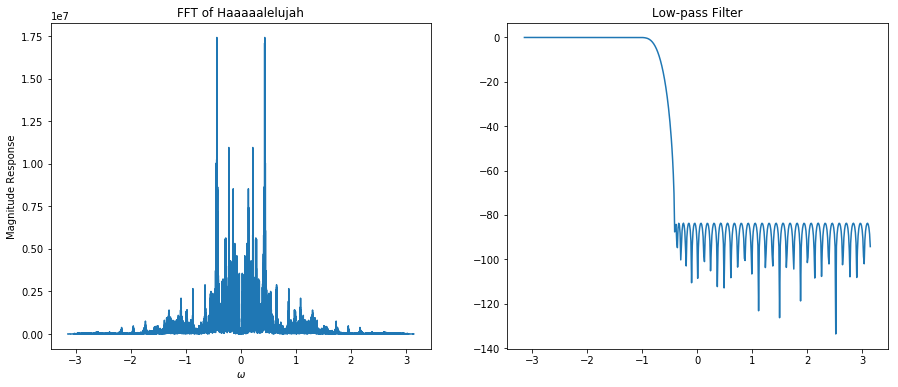

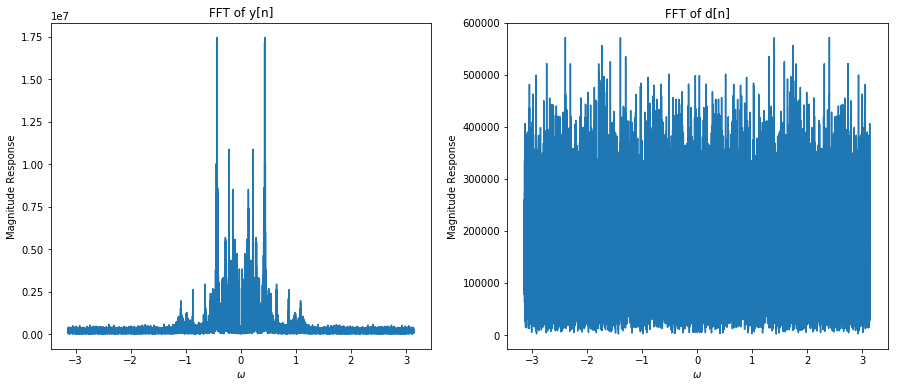

In [10]:
#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)
fs,original = wavfile.read('Sound_original.wav')

#Code for 5.a:
fft = np.fft.fft(original)
ffts = np.fft.fftshift(fft)
omega = np.linspace(-np.pi,np.pi,len(ffts))
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('FFT of Haaaaalelujah')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omega,np.absolute(ffts))

#Code for 5.b:
N = 100
a = [1,0]
c = 1./3
#Low-pass Filter
#0-0.5 is passband, 0.7-1 is the stopband, transition band is then 0.5-0.7
lpf_bands = [0,c,c+0.1,1]
lpf_desired = [1,0] #gain of one for passband, gain of zero for stopband
lpf = signal.remez(N,lpf_bands,lpf_desired,fs=2)
w,H_lpf = signal.freqz(lpf,a)
w = np.linspace(-np.pi,np.pi,len(H_lpf))
plt.subplot(122)
plt.title('Low-pass Filter')
plt.plot(w,sig2db(abs(H_lpf)))

#Code for 5.c:
x_filtered = signal.lfilter(lpf,[1,0],original)
d = 1000 * np.random.randn(len(x_filtered))
y = []
for n in range(len(x_filtered)):
    y.append(d[n] + x_filtered[n])
    
fft1 = np.fft.fft(y)
ffts1 = np.fft.fftshift(fft1)
omega1 = np.linspace(-np.pi,np.pi,len(ffts1))
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('FFT of y[n]')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omega1,np.absolute(ffts1))

fft2 = np.fft.fft(d)
ffts2 = np.fft.fftshift(fft2)
omega2 = np.linspace(-np.pi,np.pi,len(ffts2))
plt.subplot(122)
plt.title('FFT of d[n]')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omega2,np.absolute(ffts2))

In [26]:
Audio(original, rate = fs) #Original Hallelujah

In [25]:
Audio(y, rate = fs) #Hallelujah with AWGN

Comments for 5.c: I do not believe that we would be able to cleanly separate since the noise mixes itself into areas of the original signal where important information lies.



## Exercise 6: Multi-rate Sampling

Given the audio signal file ``Sound_original.wav`` with $f_s = 16,000~Hz$, we want to try some upsampling and downsampling:

a. Plot the full FFT magnitude spectrum of the audio data. Instead of using digital frequency $\omega$, in this case, we want the x-axis to be analog frequency $\Omega$ in Hz. **Hint: Use the conversion equation to convert digital frequency $-\pi$ and $\pi$ to analog frequency in Hz**.

b. Upsample the audio signal from part (a) by a factor of three. Remember you need to low-pass filter the signal with an appropriate filter before or after the upsampling, you have to decide which is correct! We have provided a filled-in version of the low-pass filtering function from Lab 7. You need to decide what constant to pass to the function and whether the filter should be used before or after upsampling. We would like the following two plots:

* Full FFT magnitude spectrum (not dB scale) after the signal is upsampled by a factor of three (x-axis in Hz). Don't forget to use fftshift!

* Full FFT magnitude spectrum (not dB scale) after the filter is applied to the signal (x-axis in Hz).

**Hint: In this case, our sampling frequency becomes 3 times bigger when upsampling by 3.**

c. Downsample the original audio signal **from part (a)** by a factor of two. Again, remember you need to low-pass filter the signal with an appropriate filter before or after the downsampling, you have to decide which is correct! We would like the following two plots:

* Full FFT magnitude spectrum after the filter is applied to the signal (x-axis in Hz).

* Full FFT magnitude spectrum after the signal is downsampled (x-axis in Hz).

**Hint: In this case, our sampling frequency becomes 1/2 of the original sampling fequency when downsampling by 2**

C:\Users\Damian\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


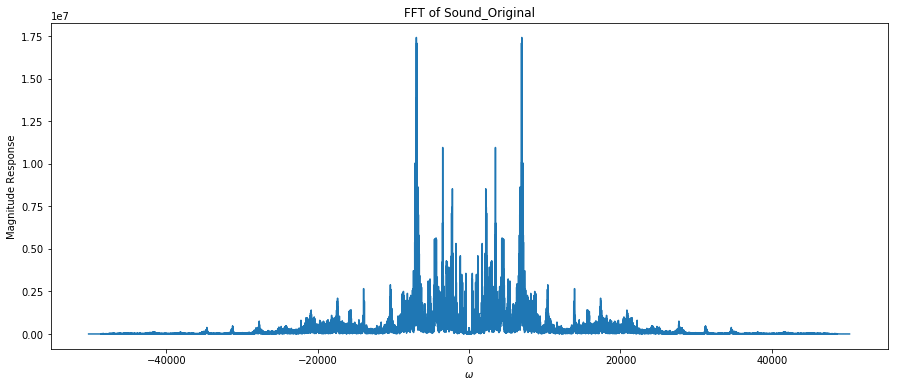

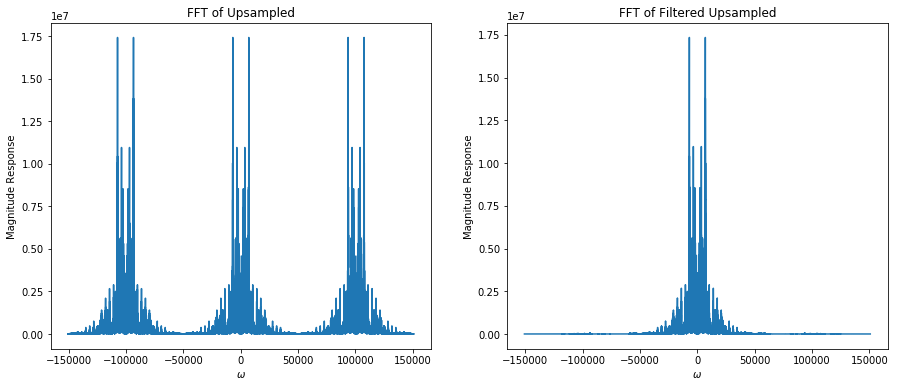

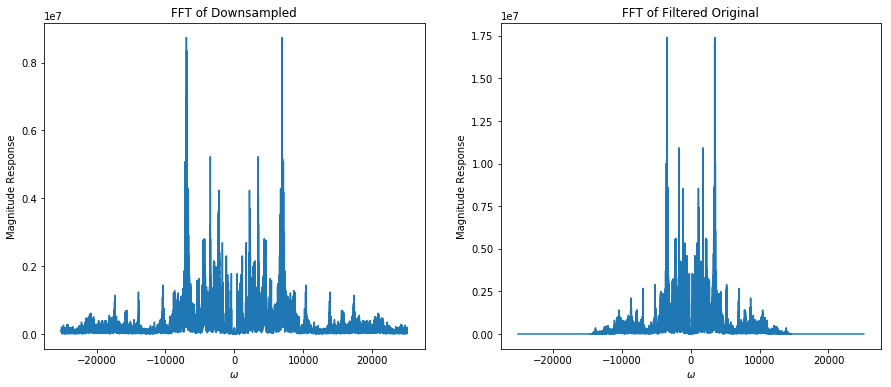

In [32]:
#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)
def lowpass(C):
    bands = [0,1/C,1/C+0.1,1]
    desired = [1,0]
    lpf = signal.remez(50,bands,desired,fs=2)
    return lpf

fs,original = wavfile.read('Sound_original.wav')
#Code for 6.a:
plt.figure(figsize=(15,6))
fft = np.fft.fft(original)
ffts = np.fft.fftshift(fft)
omega = np.linspace(-fs*np.pi,fs*np.pi,len(ffts))
plt.title('FFT of Sound_Original')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omega,np.absolute(ffts))

#Code for 6.b:
def upsample(U,x):
    upsampled = []
    for i in range(len(x)):
        upsampled.append(x[i])
        for j in range(U-1):
            upsampled.append(0)
    return upsampled

upsampled = upsample(3, original)
filteru = lowpass(3)
filtered = signal.lfilter(filteru,[1],upsampled)


plt.figure(figsize=(15,6))
plt.subplot(121)
fftu = np.fft.fft(upsampled)
fftus = np.fft.fftshift(fftu)
omegau = np.linspace(-fs*3*np.pi,fs*3*np.pi,len(fftus))
plt.title('FFT of Upsampled')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omegau,np.absolute(fftus))

plt.subplot(122)
fftf = np.fft.fft(filtered)
fftfs = np.fft.fftshift(fftf)
omegaf = np.linspace(-fs*3*np.pi,fs*3*np.pi,len(fftfs))
plt.title('FFT of Filtered Upsampled')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omegaf,np.absolute(fftfs))

#Code for 6.c:
def downsample(D,x):
    i = 0
    downsampled = []
    while(i*D < len(x)):
        downsampled.append(x[i*D])
        i = i+1
    return downsampled

filterd = lowpass(2)
filteredd = signal.lfilter(filterd,[1],original)
downsampled = downsample(2, filteredd)

plt.figure(figsize=(15,6))
plt.subplot(121)
fftd = np.fft.fft(downsampled)
fftds = np.fft.fftshift(fftd)
omegad = np.linspace(-fs*np.pi/2,fs*np.pi/2,len(fftds))
plt.title('FFT of Downsampled')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omegad,np.absolute(fftds))

plt.subplot(122)
fftfd = np.fft.fft(filteredd)
fftfsd = np.fft.fftshift(fftfd)
omegafd = np.linspace(-fs*np.pi/2,fs*np.pi/2,len(fftfsd))
plt.title('FFT of Filtered Original')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response')
plt.plot(omegafd,np.absolute(fftfsd))

# Submission Instructions:

Please place all files in one folder, compress that folder as a zip file, and name the zip file ``netid_labfinal``. Submit your zip file to Compass like previous labs.